# Market Basket Analysis and Association Rules
## MovieLens 1M Dataset

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option("max_colwidth", 150)

<b>NOTE:</b> If you do not have `mlxtend` installed, run `pip install mlxtend` or `conda install -c conda-forge mlxtend` (if using Anaconda).

## Dataset

In [2]:
base_url = 'https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/ml-1m/'
kwargs = {'sep': '::', 'header': None, 'engine': 'python', 'encoding': 'latin1'}

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(base_url + 'users.dat', names=unames, **kwargs)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(base_url + 'ratings.dat', names=rnames, **kwargs)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(base_url + 'movies.dat', names=mnames, **kwargs)

In [3]:
df = pd.merge(pd.merge(ratings, users), movies)
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [4]:
age_dict = {
     1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

occupation_dict = { 
     0: "not specified", 
     1: "academic/educator",
     2: "artist",
     3: "clerical/admin",
     4: "college/grad student",
     5: "customer service",
     6: "doctor/health care",
     7: "executive/managerial",
     8: "farmer",
     9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

df['age'] = df['age'].replace(age_dict)
df['occupation'] = df['occupation'].replace(occupation_dict)
df['title'] = df['title'].str.decode('latin1')
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### What is the distribution of the ratings?

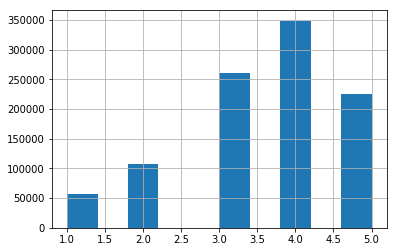

### What are top 5 most rated movies?

,mean,count
title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672


### What are the top 5 most rated genres?

genres
Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: rating, dtype: int64

### How many ratings are there for movies in the "Film-Noir" genre?

802

### Which users have the greatest number of ratings? What are their average ratings?

genres
Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: rating, dtype: int64

### Plot a boxplot of the ratings by occupation.

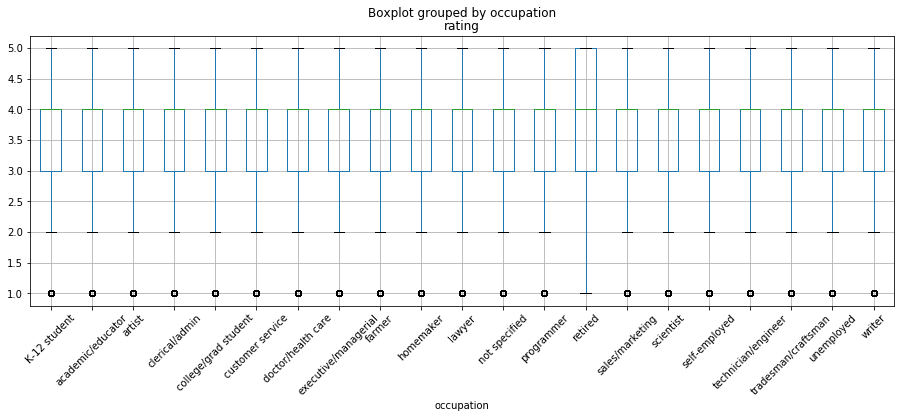

###  How many people below the age of 18 are "retired" ?   ¯\\_(ツ)_/¯ 

1

###  What are the most well-rated genres?

###  What are the ratings for each genre by users of each occupation? HINT: pivot tables

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.364407,3.260718,3.310734,3.465409,3.230872,3.191257,3.506527,3.521964,3.228070,3.718310,...,3.250567,3.492604,3.608333,3.397361,3.462857,3.442308,3.382084,3.314516,3.092486,3.199637
Action|Adventure,3.579909,3.560664,3.622727,3.699659,3.686950,3.719368,3.720000,3.724194,3.183673,3.727273,...,3.610759,3.827795,3.791667,3.736742,3.742049,3.636179,3.755342,3.680272,3.526667,3.548134
Action|Adventure|Animation,4.588235,3.875000,4.263158,3.900000,4.012048,4.000000,4.000000,4.000000,5.000000,NaN,...,4.108108,4.357143,NaN,4.250000,4.153846,4.333333,4.230769,4.000000,4.142857,4.250000
Action|Adventure|Animation|Children's|Fantasy,2.869565,3.166667,2.375000,4.000000,2.333333,2.500000,2.833333,2.833333,2.000000,3.333333,...,2.428571,2.600000,NaN,2.200000,2.250000,3.000000,2.777778,3.000000,2.500000,3.333333
Action|Adventure|Animation|Horror|Sci-Fi,3.333333,3.468750,3.833333,2.875000,3.406250,3.476190,3.642857,3.620690,3.333333,4.333333,...,3.423913,3.616667,4.000000,3.484848,3.352941,3.750000,3.636364,3.800000,3.777778,3.692308
Action|Adventure|Children's,1.200000,1.000000,1.000000,NaN,1.000000,2.500000,1.000000,1.250000,NaN,NaN,...,1.833333,1.000000,NaN,1.750000,1.000000,2.000000,1.000000,NaN,1.000000,1.000000
Action|Adventure|Children's|Comedy,2.612903,2.375000,2.310345,2.250000,2.242857,2.200000,2.722222,2.408163,3.000000,2.250000,...,2.206349,2.294118,1.333333,1.812500,2.923077,2.125000,2.434783,1.666667,1.666667,2.071429
Action|Adventure|Children's|Fantasy,2.000000,2.333333,2.000000,2.000000,2.222222,3.000000,3.000000,2.000000,3.000000,NaN,...,1.875000,1.000000,NaN,2.500000,NaN,NaN,2.333333,2.000000,1.000000,1.666667
Action|Adventure|Children's|Sci-Fi,2.033333,1.550000,1.947368,2.333333,1.905405,2.600000,1.875000,1.857143,5.000000,2.500000,...,1.921569,1.681818,1.000000,1.500000,1.857143,1.625000,1.904762,1.400000,1.777778,1.562500


### Which movies do men and women most disagree on?

## Association Rules

In [5]:
df_trans = pd.pivot_table(df[['user_id', 'movie_id', 'title']],
                          values='movie_id', index='user_id', columns='title',
                          aggfunc=lambda x: 1, fill_value=0)
df_trans.head(10)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### What are the most frequent three movies rated together?

### What is the highest support for 1-, 2-, and 3-item sets of movies?

### What is the highest confidence association rule with confidence greater than 0.5 and support greater than 0.25?